1)read the data set make it in proper formate
2)encode lables
3)convert all the cases to lower
4)remove punctuation
5)remove stop words
6)check ststs of the massge
7)convert all the text into vectors
8)import classifier
9)tran and test
10)check accuracy counfse matrix

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
sms=pd.read_csv("spam.csv", encoding='latin-1',header=None)

In [4]:
sms.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
sms.rename(columns={0:"label",1:"message"},inplace=True)
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
sms.label.value_counts()

ham     4827
spam     747
Name: label, dtype: int64

In [7]:
#Check percentage of spam messages


In [8]:
#add new column length of message
sms["length"]=sms.message.str.len()

In [9]:
#label encoding
sms["label"].replace({"ham":0,"spam":1},inplace=True)

In [10]:
#convert all to lower cases
sms["message"]=sms["message"].str.lower()

In [11]:
#replace email adress with email
sms["message"]=sms["message"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailadress')

#replace URL with web adress
sms["message"]=sms["message"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webadress')

#replace money sybols with moneysymb
sms["message"]=sms["message"].str.replace(r'£|\$','dollers')

#replace 10 digit phone numbers
sms["message"]=sms["message"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

#replace numbers with number
sms["message"]=sms["message"].str.replace(r'\d+(\.\d+)?', 'number')

<ipython-input-11-cc4ddbbea1c8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sms["message"]=sms["message"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailadress')
<ipython-input-11-cc4ddbbea1c8>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  sms["message"]=sms["message"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webadress')
<ipython-input-11-cc4ddbbea1c8>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  sms["message"]=sms["message"].str.replace(r'£|\$','dollers')
<ipython-input-11-cc4ddbbea1c8>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  sms["message"]=sms["message"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
<ipython-input-11-cc4ddbbea1c8>:14: FutureWarning: The default value of regex will change from True to False in a future 

In [12]:
sms

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in number a wkly comp to win fa cup...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61
...,...,...,...
5569,1,this is the numbernd time we have tried number...,161
5570,0,will ã¼ b going to esplanade fr home?,37
5571,0,"pity, * was in mood for that. so...any other s...",57
5572,0,the guy did some bitching but i acted like i'd...,125


In [13]:
#replace puctuations
sms["message"]=sms["message"].str.replace(r'[^\w\d\s]'," ")

#replace white space between the terms with single space
sms["message"]=sms["message"].str.replace(r'\s+',' ')

#remove leading and trailing white space
sms["message"]=sms["message"].str.replace(r'^\s+|\s+?$','')

<ipython-input-13-a4386e2a745a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sms["message"]=sms["message"].str.replace(r'[^\w\d\s]'," ")
<ipython-input-13-a4386e2a745a>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  sms["message"]=sms["message"].str.replace(r'\s+',' ')
<ipython-input-13-a4386e2a745a>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  sms["message"]=sms["message"].str.replace(r'^\s+|\s+?$','')


In [14]:
#remove stop words
import string
import nltk
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english')+ ['u', 'ur', '4', '2', 'im','doin','ure'])

sms["message"]=sms["message"].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words ))

In [15]:
sms["clean_length"]=sms.message.str.len()
sms.head()

,label,message,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joking wif oni,29,21
2,1,free entry number wkly comp win fa cup final t...,155,145
3,0,dun say early hor c already say,49,31
4,0,nah think goes usf lives around though,61,38


In [16]:
#total length removal
print("original length",sms.length.sum())
print("clean length",sms.clean_length.sum())

original length 449183
clean length 307946


In [17]:
#Convert text into vector using tf-IDF
#instatinate multinominal classifier
#split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Tf_vec=TfidfVectorizer()
naive=MultinomialNB()

features=Tf_vec.fit_transform(sms['message'])

x=features
y=sms['label']


In [18]:
#train and predict
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
naive.fit(x_train,y_train)

MultinomialNB()

In [19]:
y_pred=naive.predict(x_test)

print("final score",accuracy_score(y_test,y_pred) )
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

final score 0.9766816143497757
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       954
           1       1.00      0.84      0.91       161

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[954   0]
 [ 26 135]]


In [21]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [23]:
y_svc=svc.predict(x_test)

print("final score",accuracy_score(y_test,y_svc) )
print(classification_report(y_test,y_svc))
print(confusion_matrix(y_test,y_svc))

final score 0.9766816143497757
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       954
           1       0.99      0.84      0.91       161

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[953   1]
 [ 25 136]]


<AxesSubplot:>

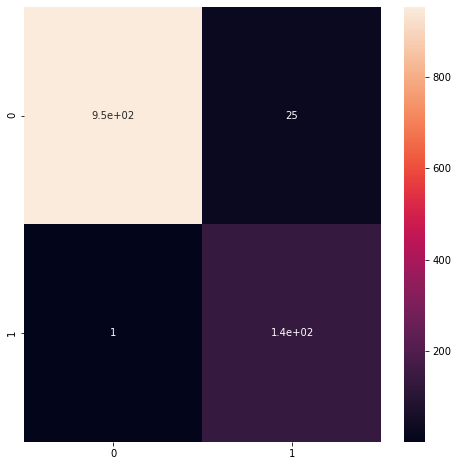

In [27]:
#confusion matrix in heat map
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_svc, y_test), annot=True)

In [29]:
import pickle
filename="spam detection.pkl"
pickle.dump(svc,open(filename,"wb"))